In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex # for latex equation
from IPython.core.display import Image # for displaying Image

In [2]:
import seaborn as sns

sns.set(color_codes=True)

sns.set(rc={'figure.figsize' : (5,5)})

# Uniform Distribution

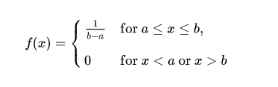

In [3]:
from scipy.stats import uniform

In [4]:
n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc=start, scale=width)

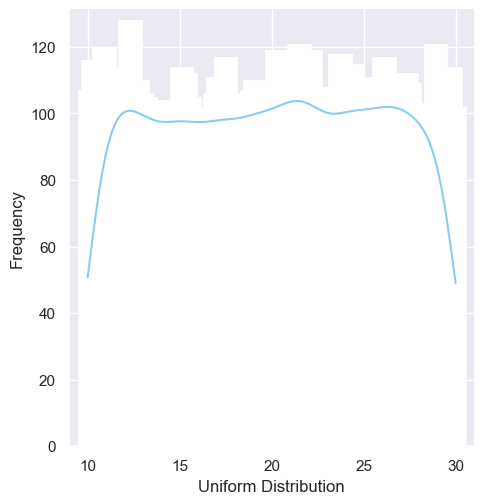

In [5]:
ax = sns.displot(data_uniform,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

# Normal Distribution

In [6]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000, loc=0, scale=1)

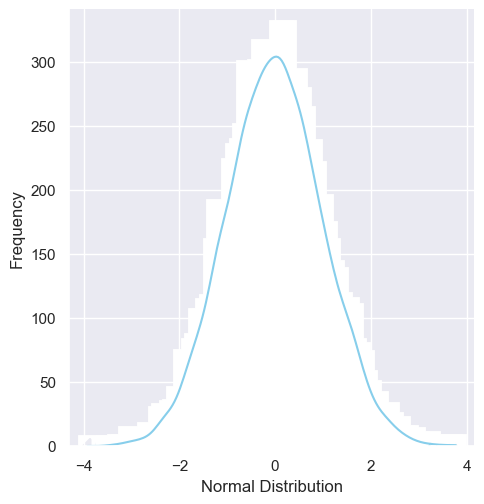

In [7]:
ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

# Gamma Distribution

In [8]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

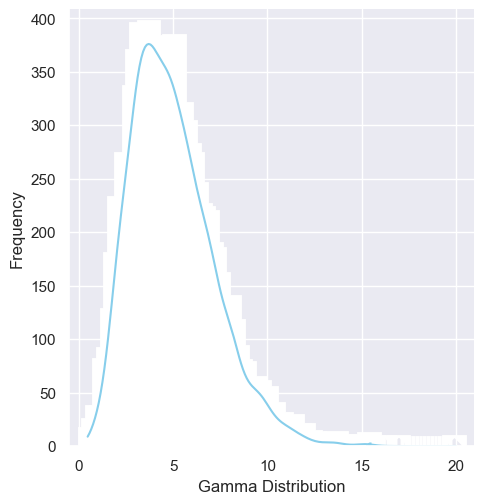

In [9]:
ax = sns.displot(data_gamma,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

# Exponential Distribution

In [10]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=10000)

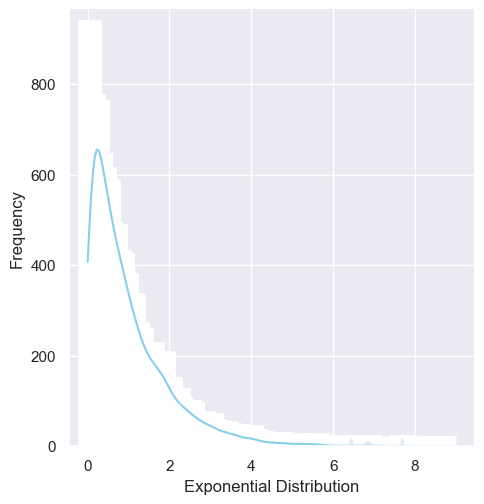

In [11]:
ax = sns.displot(data_expon,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

# Poisson Distribution

In [12]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

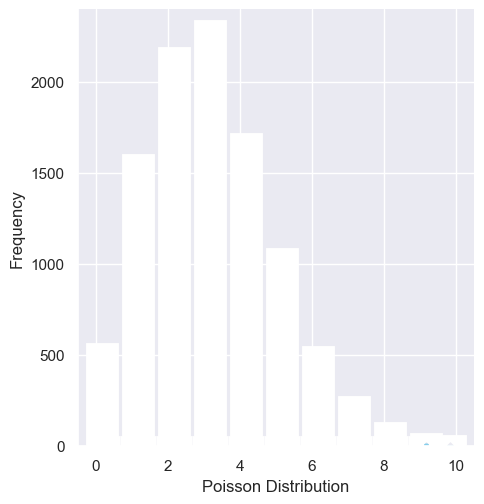

In [13]:
ax = sns.displot(data_poisson,
                 bins=30,
                 kde=False,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

# Binomial Distribution

In [14]:
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

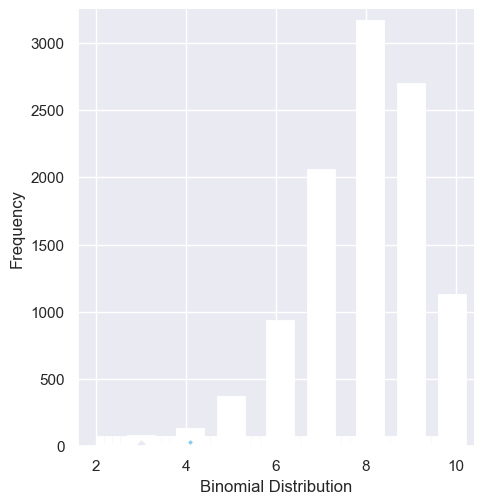

In [15]:
ax = sns.displot(data_binom,
                 kde=False,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

# Bernoulli Distribution

In [16]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

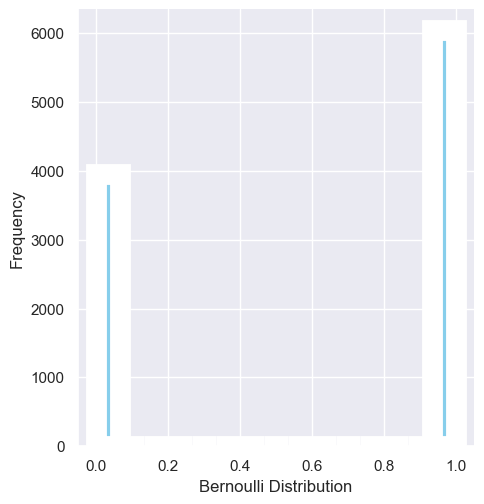

In [17]:
ax = sns.displot(data_bern,
                 kde=False,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# Confidence Interval

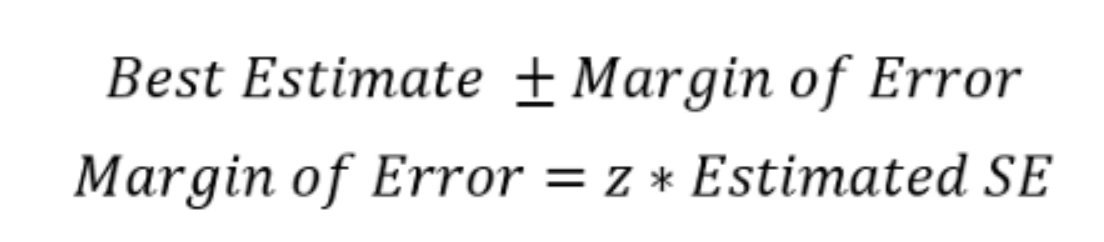

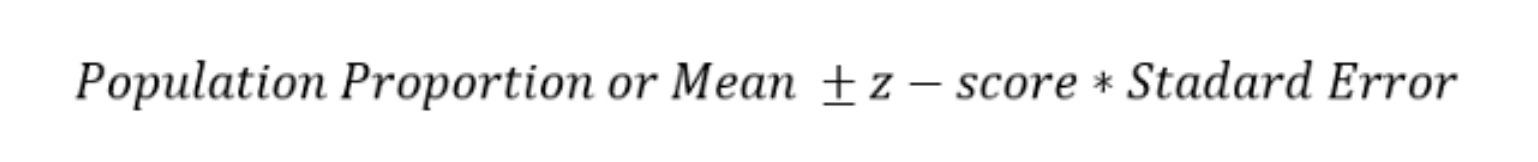

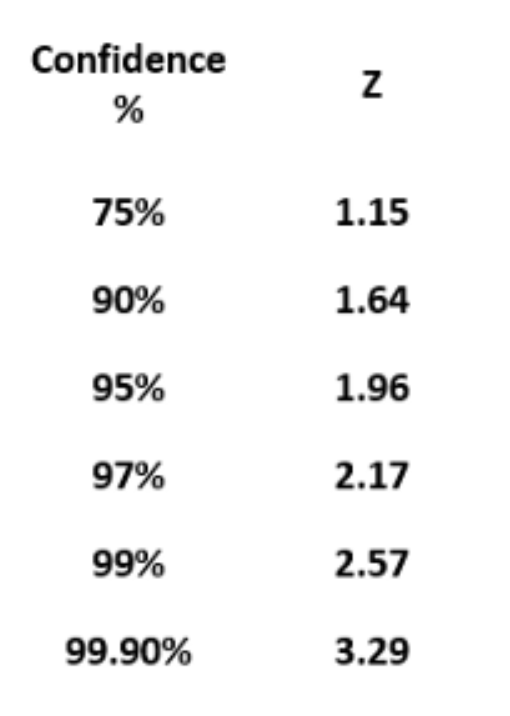

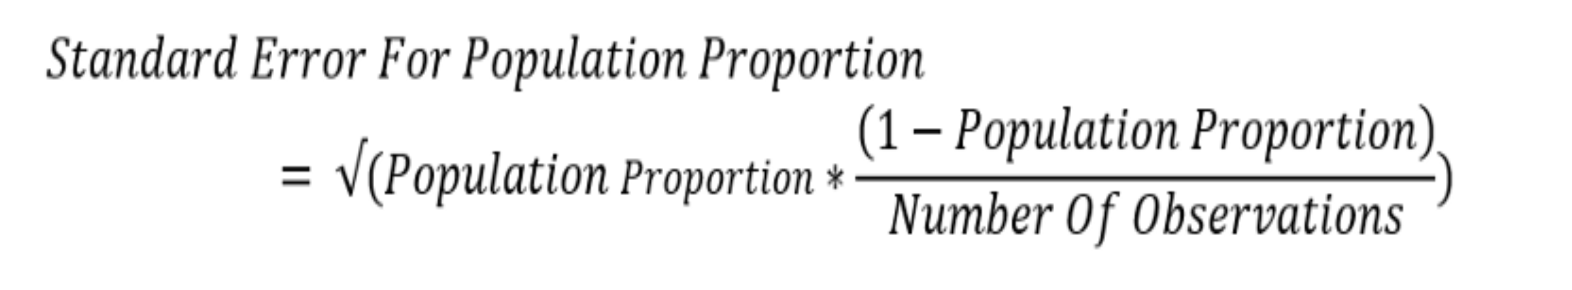

In [18]:
############

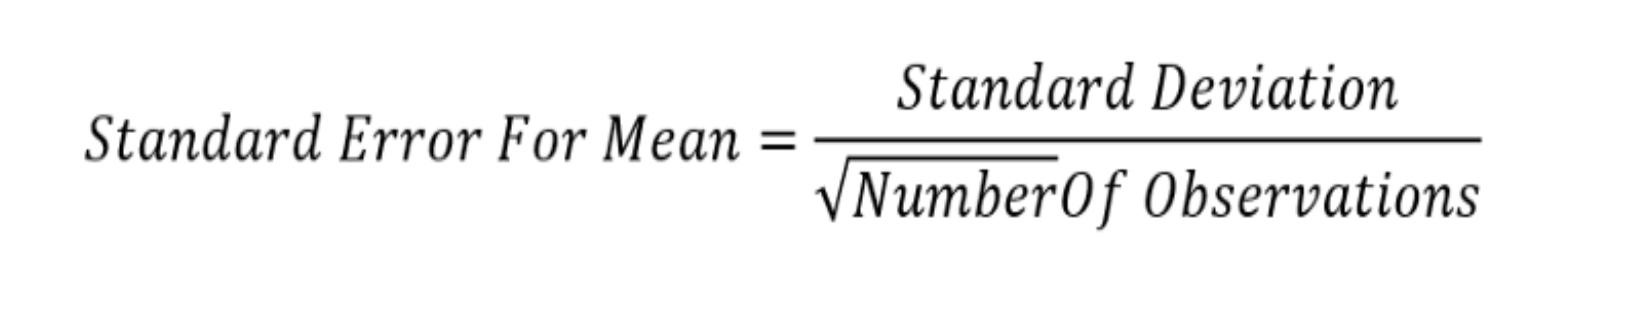

# CI for the Population Proportion

In [20]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('D:/Kuliah/Kampus Merdeka Batch 5/sesi pembelajaran/dataset/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Kolom terakhir dari data adalah 'target'. Menandakan jika seseorang menderita penyakit jantung atau tidak.

We are going to construct a CI for the female population proportion that has heart disease.

Pertama, ganti 1 dan 0 dengan 'Pria' dan 'Wanita' di kolom baru 'Sex1'.

In [23]:
df['Sex1'] = df.sex.replace({1 : 'Male', 0: 'Female'})

Kita tidak membutuhkan semua kolom dalam dataset. Kita hanya akan menggunakan kolom 'target' yang berisi apakah seseorang menderita penyakit jantung atau tidak dan kolom Sex1 yang baru saja kita buat. Buat DataFrame hanya dengan dua kolom ini dan drop semua nilai null.

In [24]:
dx = df[['target', 'Sex1']].dropna()

Kita membutuhkan jumlah wanita yang memiliki penyakit jantung. Baris kode di bawah ini menunjukkan jumlah pria dan wanita yang menderita penyakit jantung dan yang tidak menderita penyakit jantung.

In [25]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


Wanita penderita penyakit jantung berjumlah 226 orang. Hitung proporsi penduduk wanita yang menderita penyakit jantung.

In [26]:
p_fm = 226/(86+226)
p_fm

0.7243589743589743

‘p_fm’ adalah 0,72. Hitung jumlah populasi wanita:

In [27]:
n = 86+226
n

312

Jumlah populasi perempuan adalah 312. Hitung standard error

In [28]:
se_female = np.sqrt(p_fm * (1 - p_fm) / n)
se_female

0.02529714756803247

Standard error adalah 0.025.

Sekarang buat CI menggunakan rumus di atas. z-score adalah 1.96 untuk confidence interval 95%.

In [29]:
z_score = 1.96
lcb = p_fm - z_score* se_female #lower limit of the CI
ucb = p_fm + z_score* se_female #upper limit of the CI
lcb, ucb

(0.6747765651256307, 0.773941383592318)

Confidence interval adalah 0.67 dan 0.77.

Kita dapat menghitungnya menggunakan library 'statsmodels'.

In [30]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_fm, n)

(0.6747774762140357, 0.773940472503913)

Dengan hasil yang sama.

# Calculation of CI of mean

Kita akan menggunakan heart disease dataset yang sama. Dataset tersebut memiliki kolom 'chol' yang berisi tingkat kolesterol.

Berikut kode untuk mendapatkan mean, standard deviation, dan population size dari populasi pria dan wanita:

In [31]:
df.groupby("Sex1").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

Jika kita mengekstrak parameter yang diperlukan hanya untuk populasi wanita:

In [32]:
mean_fe = 261.45  #mean cholesterol of female
sd = 64.4         #standard deviation for female population
n = 312           #Total number of female
z = 1.96          #z-score from the z table mentioned before

Di sini 1.96 adalah z-score untuk confidence level 95%.

Calculate the standard error using the formula for the standard error of the mean

In [33]:
se = sd / np.sqrt(n)

Sekarang kita memiliki yang dibutuhkan untuk menghitung CI untuk mean cholesterol pada populasi wanita.

# Construct the CI

In [34]:
lcb = mean_fe - z* se  #lower limit of the CI
ucb = mean_fe + z* se  #upper limit of the CI
lcb, ucb

(254.3039731821066, 268.59602681789335)

CI adalah 254.303 and 268.596

That means the true mean of the cholesterol of the female population will fall between 254.303 and 268.596

# Other Example of Confidence Interval

In [35]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

# Generate Data of People's Mass in Pounds

Di bawah ini, kita generate dua distribusi normal menggunakan metode numpy random module's normal() untuk pria dan wanita. Kita menggabungkan dua array ini dan assign ke kolom us_people_mass_pounds di df_ppl_mass DataFrame.

In [36]:
np.random.seed(42)

normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)

all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

In [37]:
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


# View Distribution of U.S. People's Mass

Gunakan metode seaborn distplot() untuk membuat histogram di kolom us_people_mass_pounds.

Text(0.5, 1.015, "Ditribution of U.S. People's Mass")

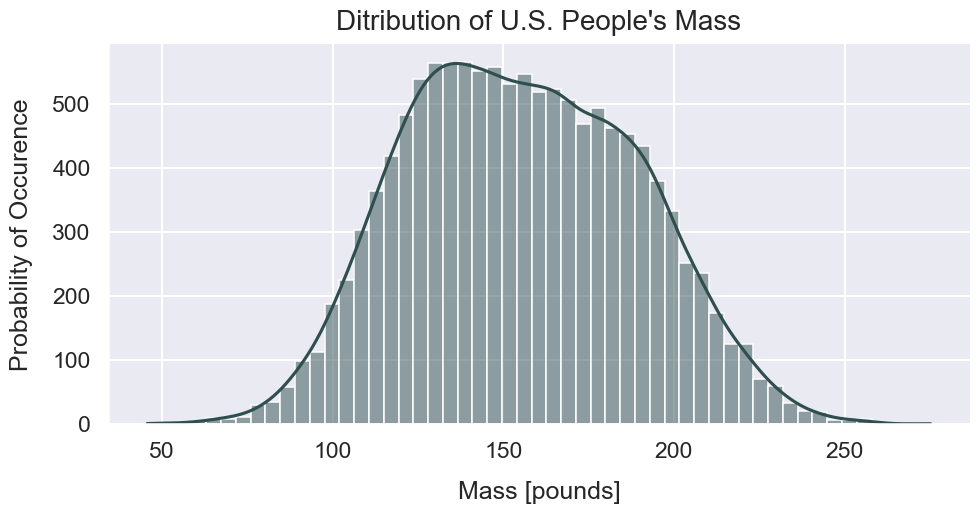

In [40]:
sns.displot(df_ppl_mass['us_people_mass_pounds'],
            color='darkslategrey',
            kde=True,
            aspect=2
            )
plt.xlabel('Mass [pounds]', labelpad=14)
plt.ylabel('Probability of Occurence', labelpad=14)
plt.title("Ditribution of U.S. People's Mass", y=1.015, fontsize=20)

Sulit untuk mengkarakterisasi distribusi ini. Distribusi tersebut memiliki satu puncak disekitar 140 pounds, dan itu bukan distribusi normal karena tidak ada simetri di sekitar nilai pusat.

In [41]:
# Calculation Population Mean
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.42328059423372

In [42]:
# Calculate Population Standard Deviation
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.585190883958624

Kita akan mengambil 300 sampel masing-masing dari 25 nilai acak. Untuk setiap sampel, kita akan menghitung rata-rata sampel. Kita menyimpan semua sample means tersebut dalam list sample_means.

In [44]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
sample_means

[159.90750287307847,
 150.61475098755304,
 148.6904069574492,
 153.41357745202356,
 164.08533136698463,
 161.13058753454064,
 163.66866976550847,
 150.3276076361436,
 151.92941547933964,
 160.94958327204978,
 168.74115875534733,
 165.14730561480752,
 151.34709083448908,
 156.37161286497292,
 169.13221663779206,
 155.23410868632928,
 153.49604114883658,
 153.0188651219491,
 151.78551289643158,
 158.767232660555,
 167.63757735094887,
 153.993693407496,
 148.9400854074848,
 173.21647917720145,
 152.80276398497844,
 157.73172295297155,
 150.90062637731018,
 159.52906055751245,
 144.16387533190016,
 155.52245861627907,
 159.48144952959746,
 149.3850975468301,
 151.5618627415609,
 151.58294627040695,
 166.35750905948188,
 157.9589035083448,
 153.2556563222487,
 163.02745544440663,
 165.11788626373323,
 160.92670060696804,
 138.61424494288335,
 152.70586857954143,
 147.31222746958235,
 156.80639225152933,
 142.75990429903635,
 150.6477169527897,
 146.52219048262702,
 167.65334364844824,
 162.

Text(27.819444444444443, 0.5, 'Frequency of Occurence')

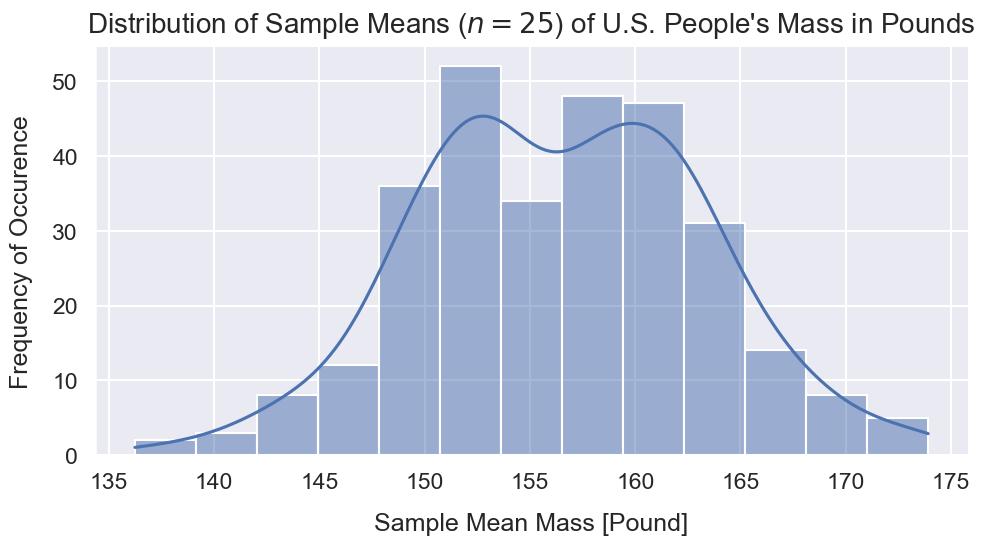

In [45]:
sns.displot(sample_means, aspect=2, kde=True)
plt.title("Distribution of Sample Means ($n=25$) of U.S. People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel('Sample Mean Mass [Pound]', labelpad=14)
plt.ylabel('Frequency of Occurence', labelpad=14)

Distribusi sample means terlihat normal. Kurva cukup simetris di sekitar nilai tengah dan median kira-kira setara dengan mean (lihat di bawah). Berdasarkan central limit theorem, pengambilan sampel dalam jumlah yang cukup dengan ukuran yang memadai akan menghasilkan distribusi sample means yang normal.

# Calculate Sampling Distribution (n=25) Summary Statistics

Berikut adalah ringkasan perhitungan statistik untuk distribusi pengambilan sampel yang divisualisasikan di atas.

In [46]:
# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)
median_of_sample_means

156.85225534252433

In [47]:
# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

156.47348887448175

In [48]:
pop_mean_mass

155.42328059423372

Nilai mean_of_sample_means ini kira-kira sama dengan nilai population mean kita yang ditetapkan ke variabel pop_mean_mass. Berdasarkan central limit theorem, hal ini akan selalu terjadi.

In [50]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.766838240648839

# Equation for Standard Deviation of Sampling Distribution

Standard deviation dari sample means lebih sering disebut standard error (SE). Persamaan untuk standard error adalah:

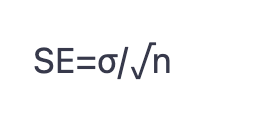

σ is population standard deviation

n is sample size

In [51]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791725

In [52]:
std_dev_of_sample_means

6.766838240648839

Nilai standard error ini sama dengan nilai yang dihitung di atas untuk std_dev_of_sample_means.

# Critical Z-Scores

Kira-kira 95% nilai akan berada dalam 2 standard errors dari mean. Mari kita hitung nilai z-score tepat yang mengikat 95% data. Kita tahu bahwa ekor pada setiap ujung harus 2,5% atau 0,025 dari total area under the curve dari sampling distribution.

Di bawah ini kita menggunakan z-score 1,96 untuk menghitung ekor 0,025.

In [53]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [54]:
# The area under the curve between the z-critcal scores is approximately 0.95
1 - (tail * 2)

0.950004209703559

Mari kita hitung batas yang tepat untuk area di mana 95% mean sampel berada dari mean populasi.

In [55]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

143.30809404796997

In [56]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

169.63888370099352

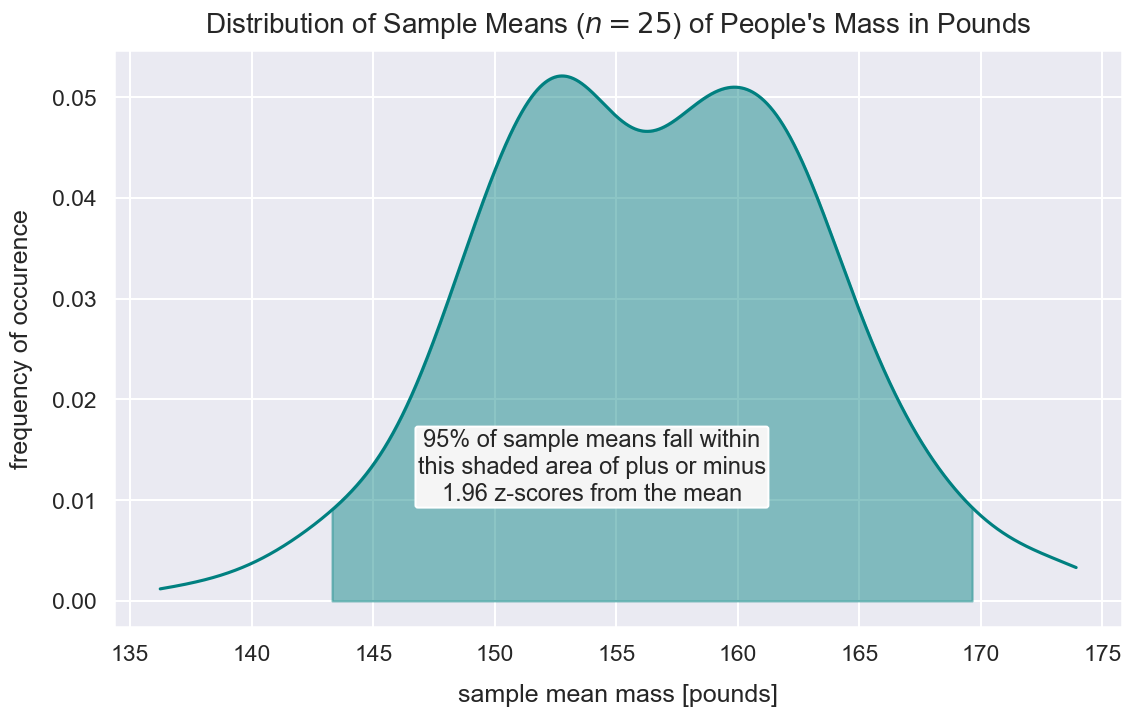

In [58]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

# Hypothesis Testing

# One Population Proportion

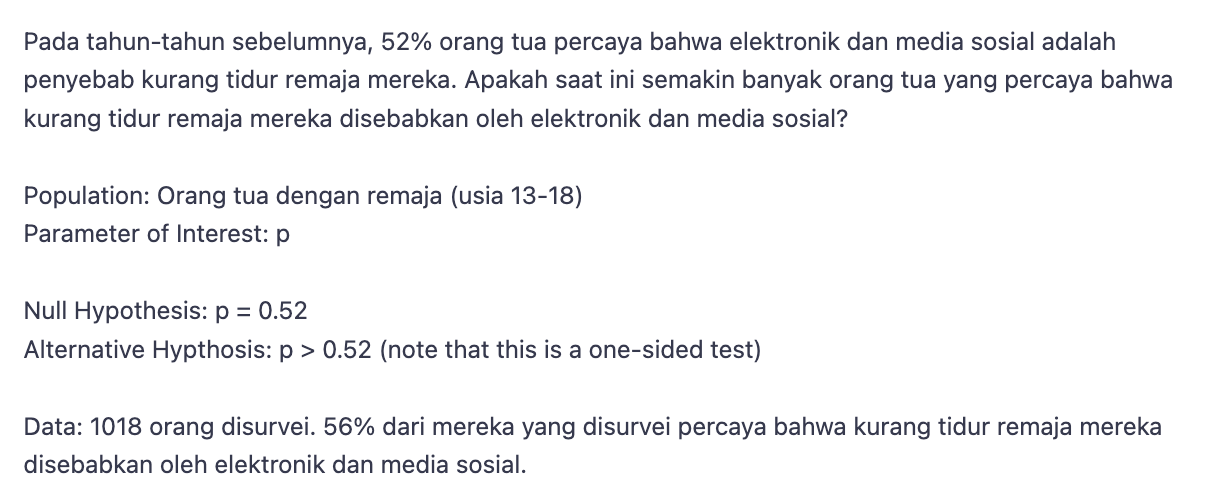



# Use of proportions_ztest() from statsmodels

Perhatikan argumen alternative = "larger" yang menunjukkan one-sided test. Fungsi ini mengembalikan dua nilai - z-statistic dan p-value yang sesuai.

In [59]:
# proportion_ztest()
n = 1018 # banyaknya data
pnull = .52
phat = .56

In [60]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [61]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative = 'larger')

(2.571067795759113, 0.005069273865860533)

Karena nilai p-value dari z-test cukup kecil, kita dapat reject the Null hypothesis bahwa persentase orang tua yang percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial sama dengan tahun-tahun sebelumnya. Perkiraan yaitu 52%.

Meskipun, kita tidak menerima hipotesis alternatif, secara informal berarti bahwa ada kemungkinan besar proporsi ini lebih dari 52%.

# Difference in Population Means

Research Question

Dengan mempertimbangkan data NHANES, apakah pria memiliki Body Mass Index rata-rata yang lebih tinggi secara signifikan daripada wanita?

Population: Adults in the NHANES data.
Parameter of Interest: μ1−μ2, Body Mass Index.

Null Hypothesis: μ1=μ2
Alternative Hypthosis: μ1≠μ2

Data:

2976 Females

μ1=29.94

σ1=7.75


2759 Male Adults

μ2=28.78

σ2=6.25



μ1−μ2=1.16

In [62]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [63]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [64]:
# Perempuan
n1 = len(females) # banyak populasi
mu1 = females["BMXBMI"].mean() # Rata rata body mass index
sd1 = females["BMXBMI"].std() # standar deviasi BMI

(n1, mu1, sd1)

(2976, 29.93994565217392, 7.75331880954568)

In [66]:
# Laki-laki
n2 = len(male) # banyak populasi
mu2 = male["BMXBMI"].mean() # Rata rata body mass index
sd2 = male["BMXBMI"].std() # standar deviasi BMI

(n2, mu2, sd2)

(2759, 28.778072111846942, 6.252567616801485)

In [67]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

# Conclusion of the hypothesis test

Karena p-value (6.59e-10) sangat kecil, kita dapat reject the Null hypothesis bahwa rata-rata BMI laki-laki sama dengan perempuan. Catatan, kita menggunakan alternative="two-sided" dalam z-test karena di sini kita memeriksa ketidaksamaan.

Kita juga dapat memplot histogram dari data untuk memeriksa apakah kira-kira distribusinya mengikuti distribusi Normal.

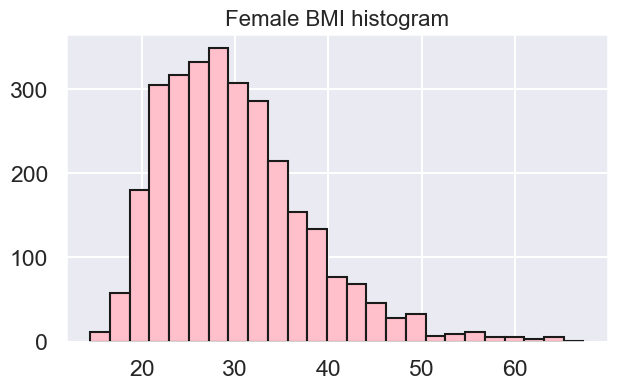

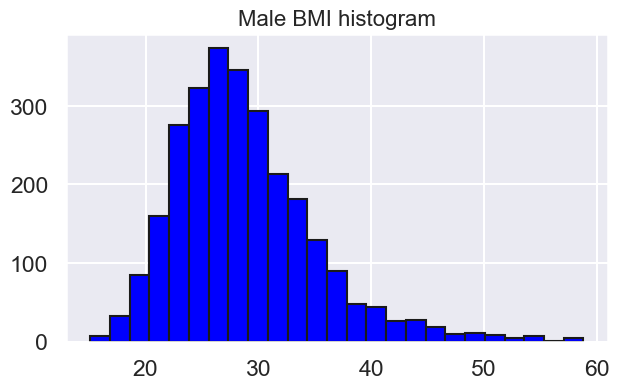

In [68]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()

# Hypothesis Testing for One Proportion

Kita akan menggunakan dataset Heart dari Kaggle. Pertama, kita mengimpor packages dan dataset:

In [69]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist

df = pd.read_csv('D:/Kuliah/Kampus Merdeka Batch 5/sesi pembelajaran/dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Kolom terakhir dari data adalah 'target'. Menandakan jika seseorang menderita penyakit jantung atau tidak. Pertanyaan penelitiannya adalah, “The population proportion of Ireland having heart disease is 42%. Are more people suffering from heart disease in the US”?

Sekarang, temukan jawaban atas pertanyaan penelitian ini selangkah demi selangkah.

Step 1: define the null hypothesis and alternative hypothesis.

Dalam permasalahan ini, null hypothesis adalah population proportion yang menderita penyakit jantung di AS kurang dari atau sama dengan 42%.

Dan hipotesis alternatifnya adalah proporsi penduduk Amerika Serikat yang menderita penyakit jantung lebih dari 42%.

Ho: p0 = 0.42  # null hypothesis
    
Ha: p > 0.42   # alternative hypothesis

Mari kita lihat apakah kita dapat menemukan bukti untuk reject the null hypothesis.

Step 2: Assume that the dataset above is a representative sample from the population of the US. So, calculate the population proportion of the US having heart disease.

In [74]:
p_us = len(df[df['target']==1]) / len(df)
p_us

0.5131707317073171

Population proportion sampel yang mengalami penyakit jantung adalah 0.51 atau 51%. Persentase ini lebih dari null hypothesis, yaitu 42%.

Tetapi pertanyaannya adalah apakah secara signifikan lebih dari 42%. Jika kita mengambil sampel acak yang berbeda, proporsi populasi yang diamati saat ini (51%) bisa berbeda.

Untuk mengetahui apakah population proportion yang diamati secara signifikan lebih dari null hypothesis, lakukan hypothesis test.

Step 3: Calculate the Test Statistic:

Berikut rumus test-statistics:

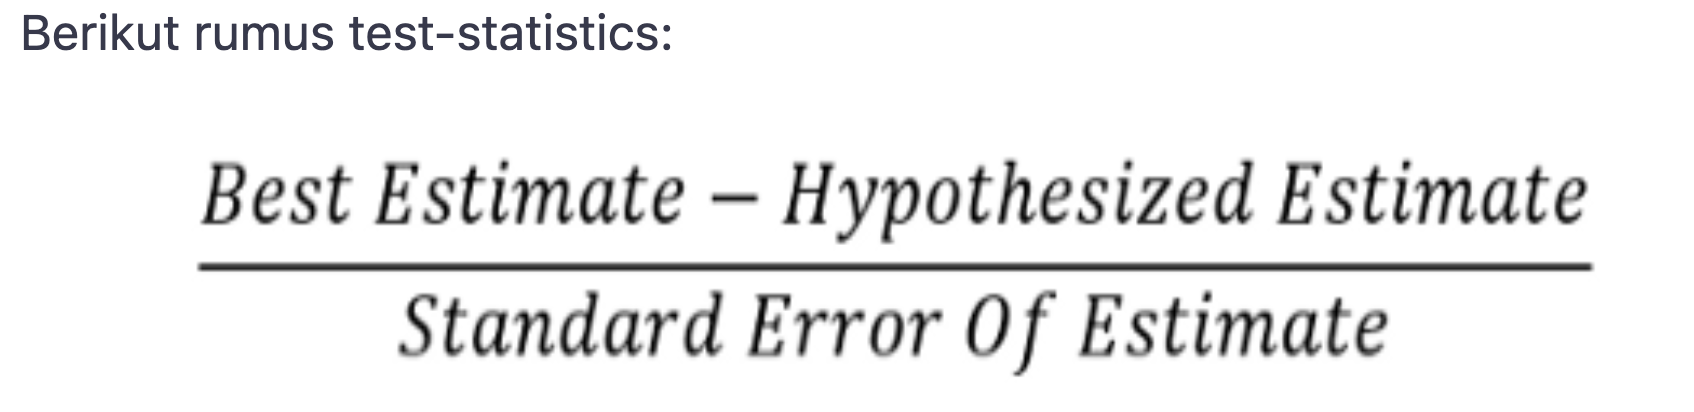

Kita menggunakan rumus ini untuk standard error:

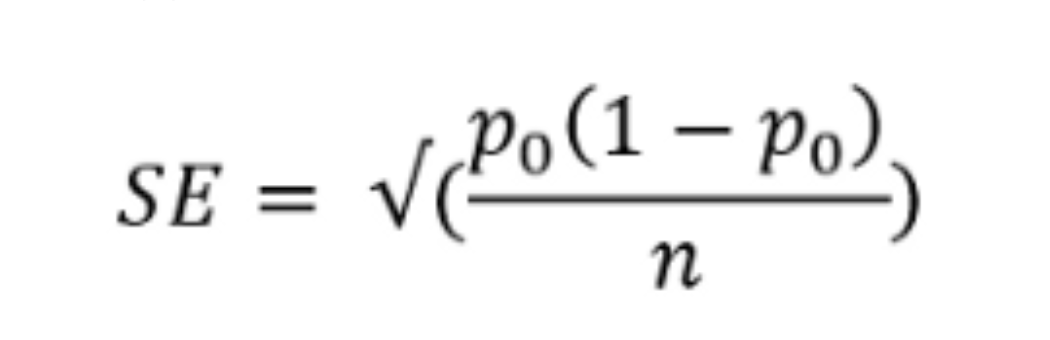

Dalam rumus ini, p0 adalah 0,42 (menurut null hypothesis) dan n adalah ukuran sample population. Sekarang hitung Standard error dan test statistics:



In [76]:
se = np.sqrt(0.42 * (1-0.42) / len(df))
se

0.015416177755376521

Lakukan test statistics menggunakan rumus test statistics di atas:

In [80]:
#Best estimate
be = p_us

#hypothesized estimate
he = 0.42
test_stat = (be - he)/se
test_stat

6.04369858636477

Hasil test statistics adalah 6.043.

Step 4: Calculate the p-value

Test statistic ini juga disebut z-score. Kita dapat menemukan p-value dari z_table atau kita dapat menemukan p-value dari rumus ini dengan python.

In [81]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

pvalue

1.5062078087269162e-09

p-value adalah 1.5062078087269162e-09.

Step 5: Infer the conclusion from the p-value

Pertimbangkan significance level alpha adalah 5% atau 0.05. Tingkat signifikansi 5% atau kurang berarti ada kemungkinan 95% atau lebih besar bahwa hasilnya tidak acak.

Di sini p-value lebih rendah dari significance level yang kita tentukan yaitu 0.05. Jadi, kita reject the null hypothesis. Artinya, terdapat perbedaan yang signifikan dalam proporsi penduduk yang menderita penyakit jantung di Irlandia dan US.